Numerical Simulation of Biofilm Growth 
## A project by the iGEM Team of Hannover
***
This notebook shows how to run a biofilm growth simulation by using the framework we implemented as part of our iGEM project in 2020. We suggest to go through the different steps presented in this notebook before starting your on model. 
We note, that the development is still in progress and invite you kindly to contribute to our Git by reporting issues!

### 0. Step: Select working directiory
****
Before we start of with the simulation, we have to make sure that the working directory is set right. This step is needed for specifying where your output should go and where the source code is stored. Change it with ``os.chdir(path)`` and replace ``path`` with the path to where the src folder is stored, if the output below doesnt match or you run into import errors

In [1]:
import os
os.chdir('/home/david/biofilm-model')

In [2]:
os.getcwd()

'/home/david/biofilm-model'

### 1. Step: Setting the constants
Now we import our custom _Constants_ Class. If you run into any Module import errors, check again if your working directory is set accordingly.

In [4]:
from src.constants import Constants


By passing the desired Bacteria strain, we can select which bacteria is used in the simulation.
Here we use Bacillus subtilis strain.

In [5]:
constants = Constants(bac_type="B.Sub.")

Now we set the global constants for the simulation. We set the number of bacteria at the start to 5 and 
the duration of the simulation to 5 minutes. Before setting the constants by yourself, make sure to check out the documentation for the right units! Until them, you can always use the default values.

In [6]:
constants.num_initial_bac = 3
constants.duration = 5 # in minutes
constants.time_step = 1 # in seconds

We freeze the simulation constants by calling three set functions.

In [7]:
constants.set_paths()
constants.set_simulation_constants()
constants.set_bacteria_constants()

and confirm the constants by printing some of them ... 

In [8]:
constants.get_paths()

{'root': PosixPath('/home/david/biofilm-model'),
 'output': PosixPath('/home/david/biofilm-model/output'),
 'info': PosixPath('/home/david/biofilm-model/output/log_18102020_19h21min/log_18102020_19h21min.json')}

In [9]:
constants.get_simulation_constants()

{'num_initial': 3, 'time_step': 1, 'window_size': (450, 900), 'duration': 5}

In [10]:
constants.get_bac_constants()

{'LENGTH': 2.999131866323531,
 'WIDTH': 1,
 'MASS': 1e-12,
 'MORTALITY_RATE': 0.0,
 'CRITICAL_LENGTH': 4.7,
 'FREE_MEAN_SPEED': 0.0022222222222222222,
 'DOUBLING_TIME': 7200,
 'GROWTH_RATE': 0.0003055555555555556,
 'MOTION_ACTIVATION_PROBABILITY': 0.0,
 'MOTION_DEACTIVATION_PROBABILITY': 0.01}

### 2. Initializing the Biofilm
***
The simulation is managed by the Biofilm class. Each Biofilm consits of Bacteria, which are represented as rigid-bodies with biological and physical parameters. The behaviour of the Bacteria is implemented in the Bacteria class. But you don't have to care about that right now, because the code will take care of the initial configuration of bacteria by default. <br> 
After importing the biofilm module we pass the above defined constants to the Biofilm. 

In [11]:
from src.biofilm import Biofilm

In [12]:
biofilm = Biofilm()
biofilm.constants = constants

### 3. Starting the simulation
*** 
Before starting, we can get an overview of the constants used in the simulation.

In [16]:
from src.utils import prompt_log_at_start
prompt_log_at_start(biofilm.constants)

 ************ BIOFILM MODELING ************ 
 A project of the iGEM Teams Hannover x Darmstadt


 ******  PATHS   ******
 root :   /home/david/biofilm-model
output :   /home/david/biofilm-model/output
info :   /home/david/biofilm-model/output/log_18102020_19h21min/log_18102020_19h21min.json

 ******  CONSTANTS   ******
   (check documentation for units)

 * Constants of B.Sub. *
LENGTH :   2.999131866323531
WIDTH :   1
MASS :   1e-12
MORTALITY_RATE :   0.0
CRITICAL_LENGTH :   4.7
FREE_MEAN_SPEED :   0.0022222222222222222
DOUBLING_TIME :   7200
GROWTH_RATE :   0.0003055555555555556
MOTION_ACTIVATION_PROBABILITY :   0.0
MOTION_DEACTIVATION_PROBABILITY :   0.01

 * Simulation constant *
num_initial :   3
time_step :   1
window_size :   (450, 900)
duration :   5



The simulation will try to use as many of your CPU cores as possible. Be aware that this might cause performance issues if you are runnning other programs in parallel.
To start the simulation we run the `` simulate_multiprocessing()`` function of the Biofilm class.

In [18]:
info_file_path = biofilm.simulate_multiprocessing()


 ********* STARTING MODELLING  USING MULTIPROCESSING ********* 
 SIMULATION TIME INTERVAL 5 min in steps of 1 s.
Using 8 cores.


100%|██████████| 300/300 [00:23<00:00, 12.81it/s]

Duration of simulate_multiprocessing : 23.570708513259888 s


### 3. Plotting the results
***
To visualize the behaviour of the bacteria inside the Biofilm we provide a variety of function to acess the stored data and use it for plotting. To acess the data from the log file, we use the function bacteria_to_pandas(), which returns all of the data as a handy pandas array, and pass the path of the info file.

In [20]:
from src.data_handling import bacteria_as_pandas
info_path = constants.get_paths(key="info")
data = bacteria_as_pandas(info_path)

We import more functions for visualisation and just need to pass the data and a path at which we want to store the graphs. 
We run the magic command `%matplotliv inline` to show the plots in the notebook

In [21]:
%matplotlib inline
from src.plotting import plot_sizes, plot_force, plot_velocities, animate_positions, plot_num, dens_map


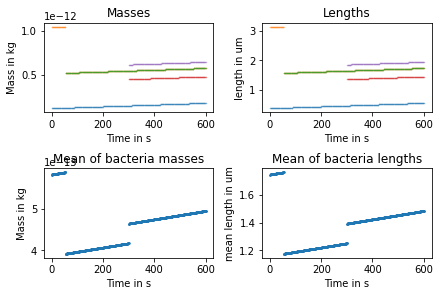

In [22]:
plot_sizes(data, info_file_path, save_fig=False)

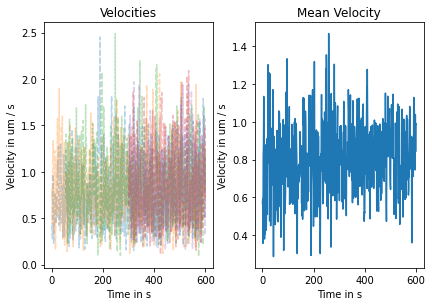

In [23]:
plot_velocities(data, info_file_path, save_fig=False)

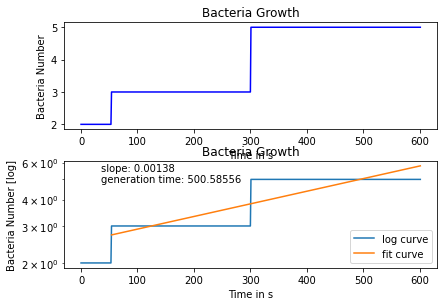

In [24]:
plot_num(data, info_file_path, save_fig=False)

/home/david/anaconda3/envs/iGEM-biofilm-model/lib/python3.8/site-packages/seaborn/distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


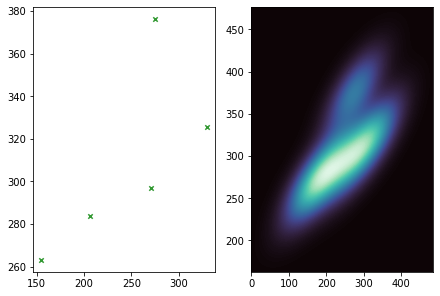

In [25]:
dens_map(data, info_file_path, save_fig=False)